In [92]:
import numpy as np
import pandas as pd
import pmdarima as pmd
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE_TDpred2024/data/complete_data/archiva.csv")
df

In [2]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE_TDpred2024/data/biweekly_data/archiva.csv")
df

,COMMIT_DATE,SQALE_INDEX,S1213,RedundantThrowsDeclarationCheck,S00117,S00122,S1488,S1905,UselessImportCheck,DuplicatedBlocks,S1226,S00112,S1155,S00108,S1151,S1132,S1481
0,2005-11-28 03:15:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2005-12-12 08:09:34,4540.0,0.0,2.0,0.0,2.0,1.0,0.0,15.0,9.0,0.0,0.0,4.0,0.0,0.0,39.0,20.0
2,2005-12-27 02:34:36,6607.0,0.0,5.0,0.0,3.0,1.0,0.0,33.0,9.0,0.0,0.0,4.0,3.0,0.0,45.0,8.0
3,2006-01-15 00:30:24,5929.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,3.0,6.0,0.0,0.0,0.0,1.0
4,2006-01-30 02:51:46,7754.0,0.0,17.0,0.0,1.0,0.0,0.0,1.0,10.0,0.0,9.0,6.0,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2011-12-19 22:38:00,108851.0,17.0,142.0,7.0,0.0,24.0,12.0,68.0,136.0,18.0,108.0,10.0,3.0,2.0,41.0,15.0
132,2012-01-04 08:49:50,110243.0,17.0,142.0,8.0,0.0,34.0,12.0,68.0,145.0,18.0,112.0,10.0,3.0,2.0,52.0,15.0
133,2012-01-18 13:43:23,110861.0,17.0,142.0,8.0,0.0,34.0,12.0,68.0,146.0,18.0,112.0,10.0,3.0,2.0,52.0,15.0
134,2012-02-02 20:39:36,121632.0,17.0,142.0,8.0,0.0,34.0,12.0,70.0,152.0,18.0,110.0,10.0,3.0,2.0,52.0,15.0


In [10]:
df.columns[1:]

Index(['SQALE_INDEX', 'S1213', 'RedundantThrowsDeclarationCheck', 'S00117',
       'S00122', 'S1488', 'S1905', 'UselessImportCheck', 'DuplicatedBlocks',
       'S1226', 'S00112', 'S1155', 'S00108', 'S1151', 'S1132', 'S1481'],
      dtype='object')

# Trying auto_arima

In [93]:
df = pd.read_csv("/Users/mrobredo23/OULU/PROMISE-TDpred2024/data/monthly_data/felix.csv")
df.COMMIT_DATE = pd.to_datetime(df.COMMIT_DATE)

# Dependent variable
sqale_index = df.SQALE_INDEX.to_numpy()

# Independent variables
xregressors = df.iloc[:, 2:].to_numpy()

# Initial data splitting.
split_point = round(len(sqale_index))
training_sqale = sqale_index[:split_point]
testing_sqale = sqale_index[split_point:]
training_xregressors = xregressors[:split_point]
testing_xregressors = xregressors[split_point:]

variable_names = df.columns[1:]
xregresors_names = variable_names[1:]

In [98]:
def optimal_d(series, max_d=3):
    """Determine optimal d by checking stationarity with ADF test."""
    for d in range(max_d + 1):
        adf_result = adfuller(np.diff(series,n=d))
        p_value = adf_result[1]
        print(p_value)
        if p_value < 0.05:  # Series is stationary
            return d
    return max_d

optimal_d(sqale_index)

0.9967077308437747
3.8106766471530434e-05


1

In [95]:
sqale_index

array([ 25998.,  26244.,  26490.,  25141.,  28171.,  26317.,  22667.,
        47372.,  56041.,  64022.,  79151.,  79602.,  96367.,  82848.,
        83558.,  83761.,  84040.,  84371.,  89351.,  89872.,  89400.,
        93054.,  95090.,  99519., 100268., 100376., 100718., 105275.,
       113126., 163907., 181760., 183540., 192623., 198636., 206333.,
       215808., 224951., 227954., 225041., 227013., 230897., 246986.,
       253394., 283530.])

In [29]:
df

,COMMIT_DATE,SQALE_INDEX,S1213,RedundantThrowsDeclarationCheck,S00117,S00122,S1488,S1905,UselessImportCheck,DuplicatedBlocks,S1226,S00112,S1155,S00108,S1151,S1132,S1481
0,2005-08-16 18:33:34,25998.0,25.0,21.0,34.0,49.0,9.0,34.0,4.0,45.0,72.0,69.0,18.0,19.0,25.0,21.0,5.0
1,2005-09-15 18:33:34,26244.0,25.0,21.0,34.0,49.5,9.0,34.5,5.0,47.0,72.0,69.0,18.0,19.0,25.0,21.0,5.0
2,2005-10-30 07:47:41,26490.0,25.0,21.0,34.0,50.0,9.0,35.0,6.0,49.0,72.0,69.0,18.0,19.0,25.0,21.0,5.0
3,2005-12-03 16:32:50,25141.0,26.0,22.0,34.0,49.0,9.0,34.0,4.0,49.0,72.0,69.0,18.0,19.0,25.0,24.0,5.0
4,2006-01-13 13:55:13,28171.0,64.0,22.0,42.0,57.0,9.0,35.0,4.0,49.0,73.0,70.0,18.0,19.0,26.0,39.0,5.0
5,2006-02-13 15:46:16,26317.0,60.0,20.0,40.0,58.0,6.0,36.0,7.0,45.0,78.0,71.0,17.0,16.0,26.0,40.0,5.0
6,2006-03-16 15:57:37,22667.0,61.0,26.0,15.0,65.0,6.0,19.0,7.0,38.0,77.0,51.0,20.0,21.0,14.0,38.0,2.0
7,2006-04-19 14:43:32,47372.0,91.0,31.0,58.0,128.0,13.0,22.0,12.0,77.0,94.0,96.0,38.0,43.0,34.0,137.0,9.0
8,2006-05-24 07:42:30,56041.0,105.0,36.0,62.0,139.0,15.0,24.0,20.0,97.0,101.0,103.0,43.0,48.0,41.0,183.0,10.0
9,2006-06-24 15:03:17,64022.0,111.0,38.0,63.0,266.0,18.0,29.0,20.0,118.0,117.0,107.0,45.0,45.0,53.0,230.0,10.0


In [106]:
arima_model = pmd.arima.auto_arima(y=training_sqale, X=training_xregressors, start_p=0, start_q=0, max_p=5, max_q=5, d=None, D=None, max_d=3, max_D=3, start_P=0, start_Q=0, max_P=5, max_Q=5, test="adf", m=12, seasonal=True, stepwise=True, enforce_stationarity=True, error_action='trace', trace=True, suppress_warnings=False, stationary=False)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=816.128, Time=0.08 sec


/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=819.453, Time=0.48 sec


/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=818.616, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=815.587, Time=0.06 sec


/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=817.170, Time=0.35 sec


/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=815.910, Time=0.30 sec


/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=816.799, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=818.365, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=818.331, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=819.798, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 2.402 seconds


/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_re

In [109]:
arima_model

AttributeError: 'ARIMA' object has no attribute 'mle_retvals'

In [108]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -391.794
Date:                Thu, 15 Feb 2024   AIC                            815.587
Time:                        16:57:04   BIC                            843.766
Sample:                             0   HQIC                           825.979
                                 - 44                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -41.2569     20.388     -2.024      0.043     -81.216      -1.298
x2            21.0786     62.000      0.340      0.734    -100.439     142.596
x3            81.8755     22.120      3.701      0.0

In [65]:
adfuller(np.log(training_sqale))

(-1.0707250592431856,
 0.72660413468686,
 0,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338},
 -70.89295830917395)

In [60]:
arima_model = pmd.auto_arima(y=training_sqale, X=training_xregressors, suppress_warnings=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=832.028, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=834.042, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=834.164, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=830.041, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.406 seconds


In [57]:
arima_model = pmd.auto_arima(y=training_sqale, X=training_xregressors,
                             m=12, seasonal=True, stepwise=True, enforce_stationarity=True,
                             error_action='trace', trace=True, suppress_warnings=False, stationary=True)

Performing stepwise search to minimize aic


/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to conver

 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=832.028, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=836.040, Time=0.15 sec


/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=836.165, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=830.041, Time=0.08 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=834.025, Time=0.10 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=834.021, Time=0.25 sec


/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=834.042, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=834.164, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 2.454 seconds


/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1500.438, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1592.151, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1529.230, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1521.265, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1644.159, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1489.812, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1487.885, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1489.874, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1491.796, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1509.416, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.089 seconds
Test RMSE: 1258.625


/Users/mrobredo23/OULU/PROMISE-TDpred2024/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Text(0.5, 0, 'Year')

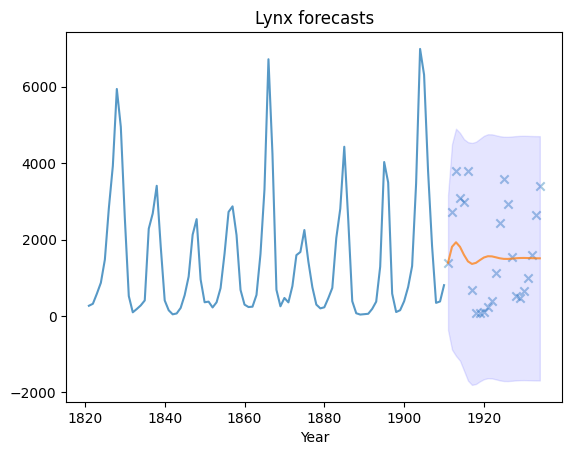

In [89]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# #############################################################################
# Load the data and split it into separate pieces
data = pm.datasets.load_lynx()
train, test = model_selection.train_test_split(data, train_size=90)

# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True,max_d=5, max_D=5, trace=True, suppress_warnings=False, stationary=False)

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

# #############################################################################
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1821  # Year starts at 1821

plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Lynx forecasts")
plt.xlabel("Year")

In [83]:
pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
              max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
              stepwise=True, D=10, max_D=10)

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)